<a href="https://colab.research.google.com/github/Mallerlyn1/mallerlyn1/blob/main/modeloarris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import joblib

In [ ]:
modelo = joblib.load('/content/modelo.pkl')

In [ ]:
data = pd.read_csv('/content/SiteLicenseDetailsReport_E6000 Gen1 Card_IZZI_IZZI-TVC ORIENTE E6000 Gen-1_5_26_2025-6_26_2025.csv')
data

,Device UID,License Status,Generated Date (UTC),Generated By,Revoked Date (UTC),Revoked By,Feature Count,Upstream Channel (ID:1) Value,Upstream Channel (ID:1) Key,Annex B Downstream Channel (ID:2) Value,Annex B Downstream Channel (ID:2) Key,Annex A Downstream Channel (ID:3) Value,Annex A Downstream Channel (ID:3) Key
0,12423CDN0020,Active,5/26/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,168.0,CC7B8B58829D51F7,NaN,NaN
1,13303CDN0066,Active,6/17/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,240.0,C9BD363BEB42ED77,NaN,NaN
2,14413CDN0280,Active,6/10/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,216.0,C6D8FB4F7575F1EB,NaN,NaN
3,16317CDN0017,Active,6/10/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,168.0,CE4662BDCFE86CC0,NaN,NaN
4,17367CDN0103,Active,6/9/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,208.0,DA2A8C6574B5E741,NaN,NaN
5,15173CDN0518,Active,5/26/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,152.0,A9E3F393CBBBFC6D,NaN,NaN
6,14333CDN0558,Active,6/4/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,248.0,ACB05BE01B5DC623,NaN,NaN
7,15193CDN0527,Active,6/11/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,128.0,916112097032CD88,NaN,NaN
8,14443CDN0666,Active,6/11/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,120.0,84247402010A1889,NaN,NaN
9,14333CDN0473,Active,6/10/2025,Mallerlyn Cristina Linares,NaN,NaN,1.0,NaN,NaN,216.0,B35C51FFE860E610,NaN,NaN


In [ ]:
data.shape

(40, 13)

In [ ]:
data_c = data.copy()
columnas_no_necesarias =[
 "License Status","Revoked Date (UTC)","Revoked By","Annex A Downstream Channel (ID:3) Value","Annex A Downstream Channel (ID:3) Key",
]

print("Columns in data_c:", data_c.columns)

Columns in data_c: Index(['Device UID', 'License Status', 'Generated Date (UTC)', 'Generated By',
       'Revoked Date (UTC)', 'Revoked By', 'Feature Count',
       'Upstream Channel (ID:1) Value', 'Upstream Channel (ID:1) Key',
       'Annex B Downstream Channel (ID:2) Value',
       'Annex B Downstream Channel (ID:2) Key',
       'Annex A Downstream Channel (ID:3) Value',
       'Annex A Downstream Channel (ID:3) Key'],
      dtype='object')


In [ ]:
columnas_no_necesarias = [col for col in columnas_no_necesarias if col in data_c.columns]
data_c.drop(columns=columnas_no_necesarias, inplace=True)

In [ ]:
data_c.head()

,Device UID,Generated Date (UTC),Generated By,Feature Count,Upstream Channel (ID:1) Value,Upstream Channel (ID:1) Key,Annex B Downstream Channel (ID:2) Value,Annex B Downstream Channel (ID:2) Key
0,12423CDN0020,5/26/2025,Mallerlyn Cristina Linares,1.0,NaN,NaN,168.0,CC7B8B58829D51F7
1,13303CDN0066,6/17/2025,Mallerlyn Cristina Linares,1.0,NaN,NaN,240.0,C9BD363BEB42ED77
2,14413CDN0280,6/10/2025,Mallerlyn Cristina Linares,1.0,NaN,NaN,216.0,C6D8FB4F7575F1EB
3,16317CDN0017,6/10/2025,Mallerlyn Cristina Linares,1.0,NaN,NaN,168.0,CE4662BDCFE86CC0
4,17367CDN0103,6/9/2025,Mallerlyn Cristina Linares,1.0,NaN,NaN,208.0,DA2A8C6574B5E741


In [ ]:
data_c.shape

(40, 8)

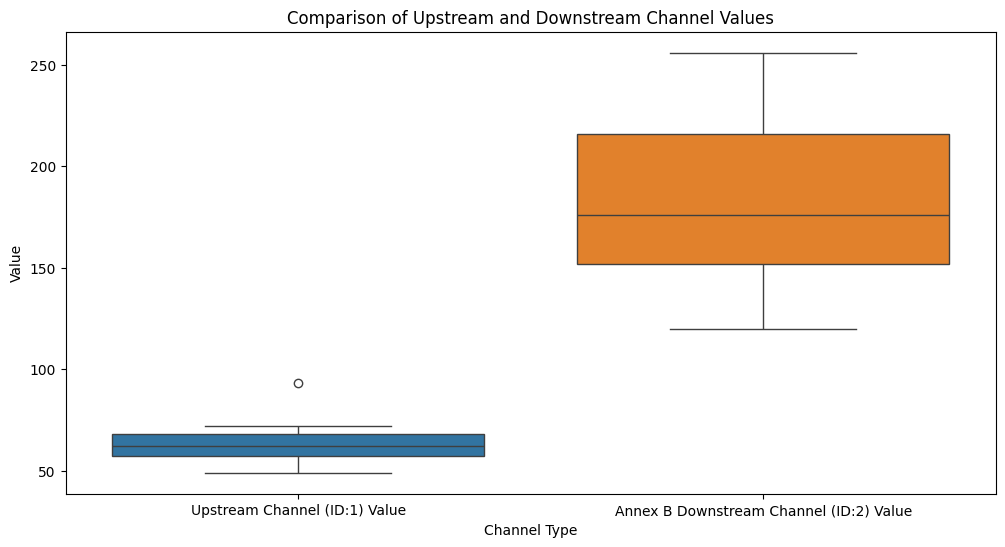

In [ ]:
comparison_data = data_c[['Upstream Channel (ID:1) Value', 'Annex B Downstream Channel (ID:2) Value']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=comparison_data)
plt.title('Comparison of Upstream and Downstream Channel Values')
plt.ylabel('Value')
plt.xlabel('Channel Type')
plt.show()

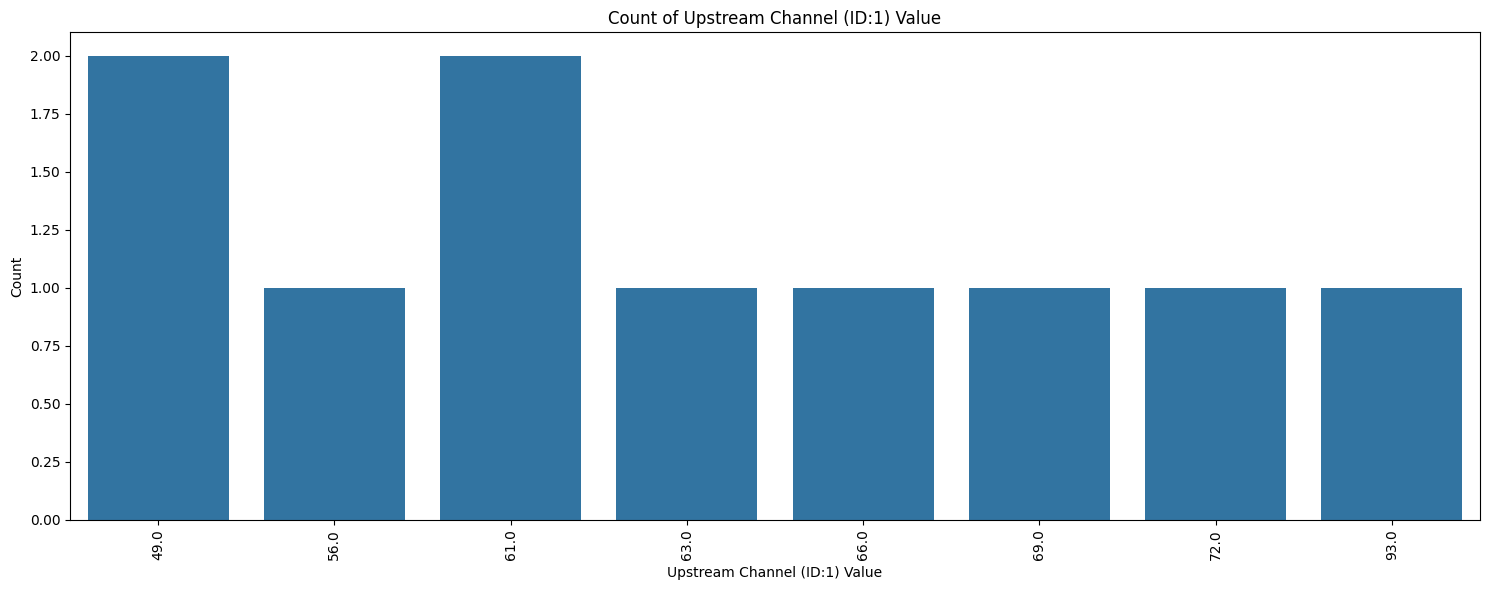

In [ ]:
plt.figure(figsize=(15,6))
upstream_counts = data_c['Upstream Channel (ID:1) Value'].value_counts()
sns.barplot(x=upstream_counts.index, y=upstream_counts.values).set(xlabel ="Upstream Channel (ID:1) Value", ylabel = "Count", title ="Count of Upstream Channel (ID:1) Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(data_c, 'data_c.pkl')

['data_c.pkl']